## Importando bibliotecas:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

## Lendo o CSV e criando DataFrame

In [2]:
csv = pd.read_csv('demo01.csv')
df_credit = pd.DataFrame(csv)

## Explorando e Tratando os dados do DataFrame 

Identificando tipo de cada coluna

In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

Identificando dados nulos

In [4]:
df_credit.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

Ajustando coluna 'mau' True = 0 e False = 1, variavel resposta:

In [5]:
df_credit['mau'] = df_credit['mau'].map({True:0, False:1})

Ajustando coluna 'sexo' para int 0 = M e 1 = F

In [6]:
df_credit['sexo'] = df_credit['sexo'].map({'M': 0, 'F': 1})
sexo_counts = df_credit['sexo'].value_counts()

Amostra de homens e mulheres [bom e mau] tem mais mulheres do que homens:

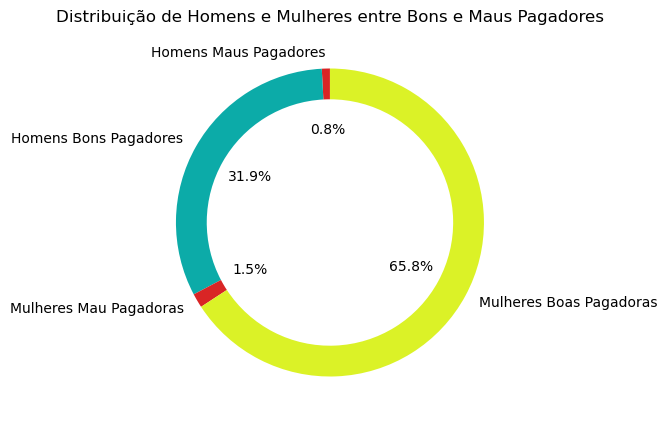

In [7]:
sexo_mau_counts = df_credit.groupby(['sexo', 'mau']).size().unstack()
sexo_mau_totals = sexo_mau_counts.sum(axis=1)
labels = ['Homens Maus Pagadores', 'Homens Bons Pagadores', 'Mulheres Mau Pagadoras', 'Mulheres Boas Pagadoras']
values = [
    sexo_mau_counts.loc[0, 0],  # Homens Mau Pagadores
    sexo_mau_counts.loc[0, 1],  # Homens Bom Pagadores
    sexo_mau_counts.loc[1, 0],  # Mulheres Mau Pagadoras
    sexo_mau_counts.loc[1, 1]   # Mulheres Boas Pagadoras
]
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#D92525', '#0CABA8', '#D92525', '#DBF227'], wedgeprops={'width': 0.2})
plt.title('Distribuição de Homens e Mulheres entre Bons e Maus Pagadores')
plt.show()

Ajustando variaveis categoricas em Y=0 e N=1

In [8]:
df_credit['posse_de_veiculo'] = df_credit['posse_de_veiculo'].map({'Y':0, 'N':1})
df_credit['posse_de_imovel'] = df_credit['posse_de_imovel'].map({'Y':0, 'N':1})

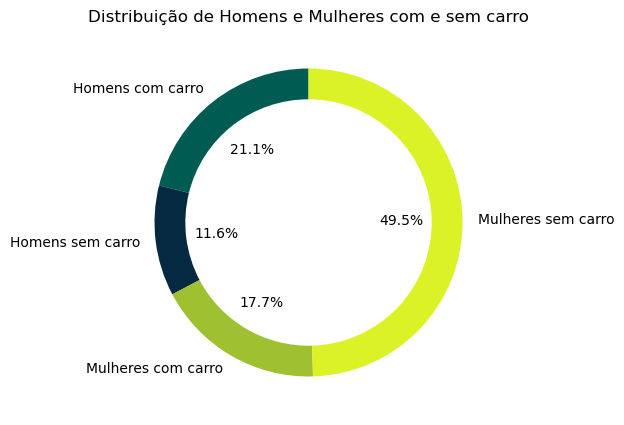

In [9]:
sexo_car_counts = df_credit.groupby(['sexo', 'posse_de_veiculo']).size().unstack()
sexo_car_totals = sexo_car_counts.sum(axis=1)
labels = ['Homens com carro', 'Homens sem carro', 'Mulheres com carro', 'Mulheres sem carro']
values = [
    sexo_car_counts.loc[0, 0],  # Homens com carro
    sexo_car_counts.loc[0, 1],  # Homens sem carro
    sexo_car_counts.loc[1, 0],  # Mulheres com carro
    sexo_car_counts.loc[1, 1]   # Mulheres sem carro
]
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#005C53', '#042940', '#9FC131', '#DBF227'], wedgeprops={'width': 0.2})
plt.title('Distribuição de Homens e Mulheres com e sem carro')
plt.show()

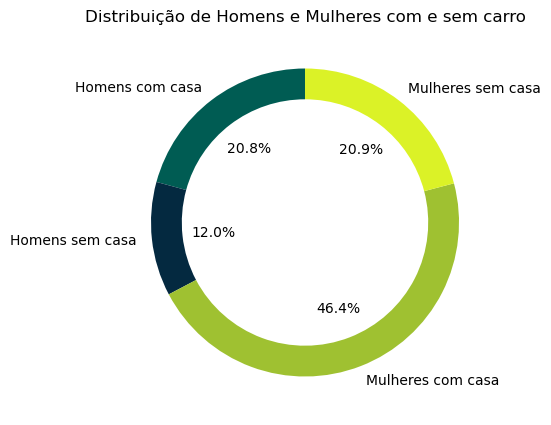

In [10]:
sexo_house_counts = df_credit.groupby(['sexo', 'posse_de_imovel']).size().unstack()
sexo_house_totals = sexo_house_counts.sum(axis=1)
labels = ['Homens com casa', 'Homens sem casa', 'Mulheres com casa', 'Mulheres sem casa']
values = [
    sexo_house_counts.loc[0, 0],  # Homens com casa
    sexo_house_counts.loc[0, 1],  # Homens sem casa
    sexo_house_counts.loc[1, 0],  # Mulheres com casa
    sexo_house_counts.loc[1, 1]   # Mulheres sem casa
]
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#005C53', '#042940', '#9FC131', '#DBF227'], wedgeprops={'width': 0.2})
plt.title('Distribuição de Homens e Mulheres com e sem carro')
plt.show()

Nessa tabela cruzada, podemos ver que ter um imovel ou carro (Y=0) tem baixa relação com ser bom ou mau pagador. 

In [11]:
crosstap_mau_house = pd.crosstab(df_credit['mau'], df_credit['posse_de_imovel'], margins=True)
print(crosstap_mau_house)
#df_credit['posse_de_imovel'].shape

posse_de_imovel      0     1    All
mau                                
0                  230   160    390
1                10946  5314  16260
All              11176  5474  16650


In [12]:
crosstap_mau_house = pd.crosstab(df_credit['mau'], df_credit['posse_de_veiculo'], margins=True)
print(crosstap_mau_house)
#df_credit['posse_de_veiculo'].shape

posse_de_veiculo     0      1    All
mau                                 
0                  143    247    390
1                 6329   9931  16260
All               6472  10178  16650


Aplicando faixa de categoria na coluna 'qtd_filhos'

In [13]:
df_credit.loc[df_credit['qtd_filhos'] >= 2, 'qtd_filhos']='2More'
print(df_credit['qtd_filhos'].value_counts())
df_credit = pd.get_dummies(df_credit, columns=['qtd_filhos'])

qtd_filhos
0        11486
1         3393
2More     1771
Name: count, dtype: int64


C:\Users\djang\AppData\Local\Temp\ipykernel_10836\585746600.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2More' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_credit.loc[df_credit['qtd_filhos'] >= 2, 'qtd_filhos']='2More'


In [14]:
df_credit['tipo_renda'].value_counts()

tipo_renda
Working                 8565
Commercial associate    3826
Pensioner               2800
State servant           1451
Student                    8
Name: count, dtype: int64

In [15]:
df_credit.loc[df_credit['tipo_renda'].isin(['Pensioner', 'State servant', 'Student']), 'tipo_renda'] = 'State servant'
df_credit['tipo_renda'].value_counts()
df_credit = pd.get_dummies(df_credit, columns=['tipo_renda'])

Aplicando faixa de categoria em 'educação'.

In [16]:
df_credit['educacao'].value_counts()

educacao
Secondary / secondary special    11245
Higher education                  4551
Incomplete higher                  649
Lower secondary                    188
Academic degree                     17
Name: count, dtype: int64

In [17]:
df_credit.loc[df_credit['educacao'].isin(['Secondary / secondary special', 'Incomplete higher']), 'educacao'] = 'Secondary'
df_credit.loc[df_credit['educacao'].isin(['Higher education', 'Academic degree']), 'educacao'] = 'Academic degree'
df_credit['educacao'].value_counts()
df_credit = pd.get_dummies(df_credit, columns=['educacao'])

Aplicando faixa de categorização em 'estado_civil'

In [18]:
df_credit['estado_civil'].value_counts()


estado_civil
Married                 11680
Single / not married     2035
Civil marriage           1283
Separated                 945
Widow                     707
Name: count, dtype: int64

In [19]:
df_credit.loc[df_credit['estado_civil'].isin(['Single / not married', 'Separated']), 'estado_civil'] = 'Single'
df_credit.loc[df_credit['estado_civil'].isin(['Married', 'Civil marriage']), 'estado_civil'] = 'Married'
df_credit['estado_civil'].value_counts()
df_credit = pd.get_dummies(df_credit, columns=['estado_civil'])

Aplicando faixa para 'tipo_residencia'.

In [20]:
df_credit['tipo_residencia'].value_counts()

tipo_residencia
House / apartment      14974
With parents             738
Municipal apartment      520
Rented apartment         227
Office apartment         120
Co-op apartment           71
Name: count, dtype: int64

In [21]:
df_credit.loc[df_credit['tipo_residencia'].isin(['Municipal apartment', 'House / apartment', 'Office apartment']), 'tipo_residencia'] = 'House / apartment'
df_credit.loc[df_credit['tipo_residencia'].isin(['Co-op apartment', 'Rented apartment']), 'tipo_residencia'] = 'Rented apartment'
df_credit['tipo_residencia'].value_counts()
df_credit = pd.get_dummies(df_credit, columns=['tipo_residencia'])

Observando o grafico de correlação, não temos nenhuma cor azul escuro perto da variavel resposta 'mau', isso significa que não existe muita correlação entre essas variaveis (tipo_renda, educacao, estado_civil, tipo_residencia).

<Axes: >

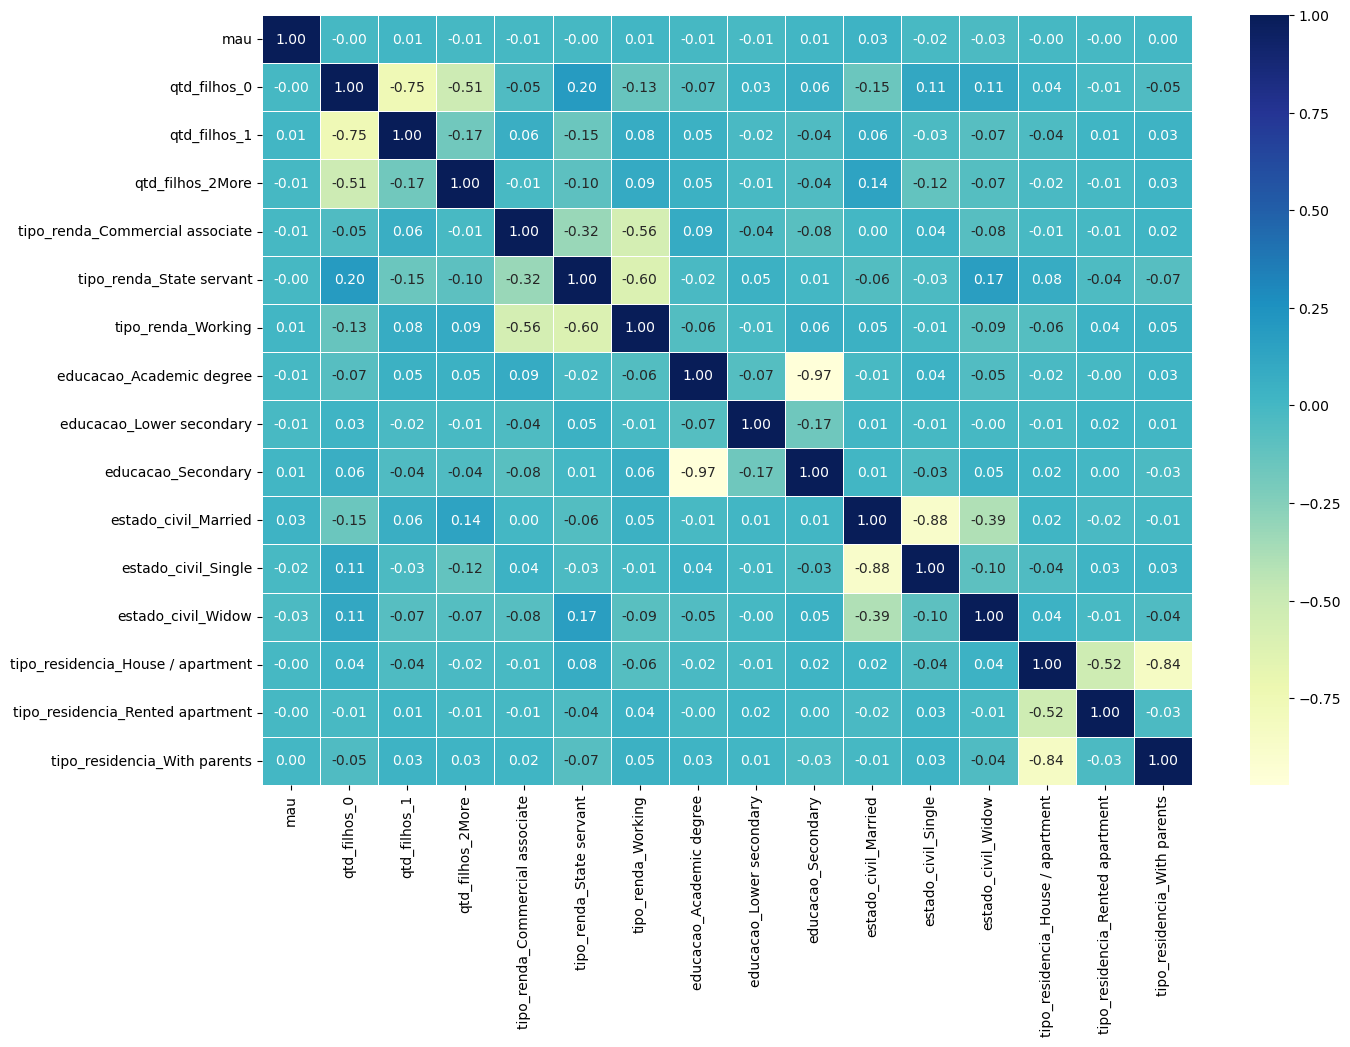

In [22]:
df_credit_encoded = df_credit.iloc[:, -16:]
correlacao_matrix = df_credit_encoded.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlacao_matrix,
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap='YlGnBu')

In [23]:
df_credit['idade'] = df_credit['idade'].astype(int)
df_credit['idade'].value_counts()
df_credit['idade'].unique()

array([58, 52, 46, 29, 27, 30, 34, 32, 56, 43, 44, 55, 42, 37, 28, 48, 61,
       45, 51, 54, 24, 38, 40, 36, 35, 59, 26, 53, 62, 50, 57, 33, 41, 60,
       63, 25, 22, 64, 47, 39, 23, 49, 65, 31, 66, 67, 68])

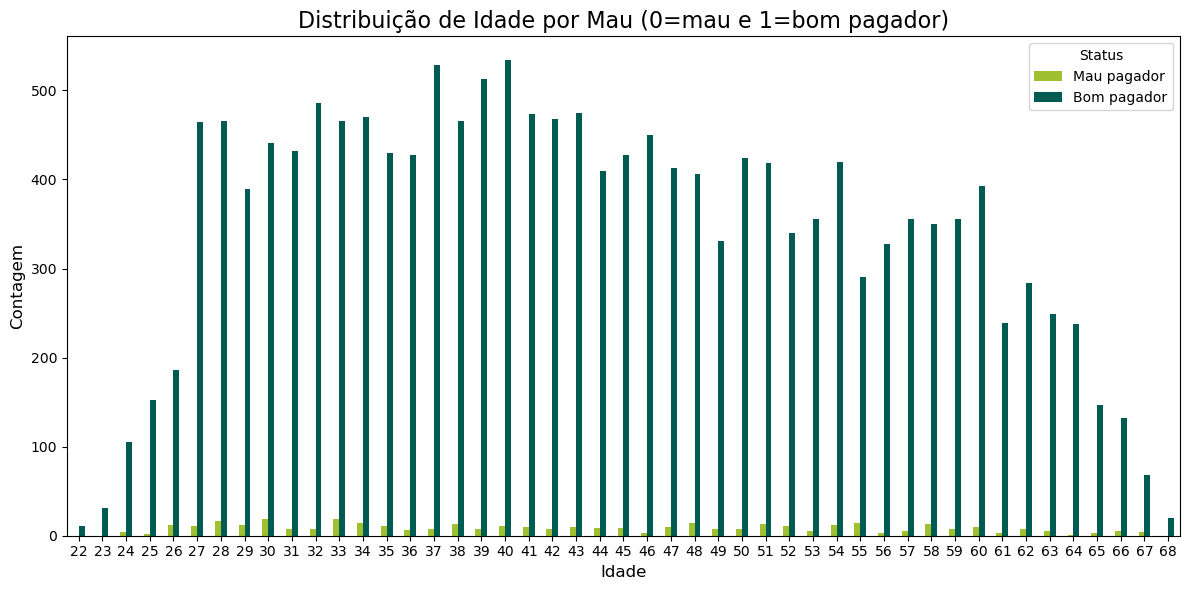

In [24]:
age_meu_counts = df_credit.groupby(['idade', 'mau']).size().unstack()
age_meu_counts.plot(kind='bar', figsize=(12,6), color=['#9FC131','#005C53'])
plt.title('Distribuição de Idade por Mau (0=mau e 1=bom pagador)', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Mau pagador','Bom pagador'], title="Status")
plt.tight_layout()

Tratando a variavel 'tempo_emprego', identificado um outline (-1000) retirado e aplicado a média ao novo numero.

In [25]:
df_credit['tempo_emprego'] = df_credit['tempo_emprego'].astype(int)
df_credit['tempo_emprego'] = df_credit['tempo_emprego'].replace(-1000, 6)

In [26]:
df_credit['qt_pessoas_residencia'] = df_credit['qt_pessoas_residencia'].astype(int)
df_credit.loc[df_credit['qt_pessoas_residencia'] >= 3, 'qt_pessoas_residencia'] = '3More'
df_credit = pd.get_dummies(df_credit, columns=['qt_pessoas_residencia'])


C:\Users\djang\AppData\Local\Temp\ipykernel_10836\55070396.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3More' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_credit.loc[df_credit['qt_pessoas_residencia'] >= 3, 'qt_pessoas_residencia'] = '3More'


Convertendo os booleanos em True=1 e False=0.

In [27]:
df_credit[df_credit.columns] = df_credit[df_credit.columns].astype(int)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   sexo                               16650 non-null  int32
 1   posse_de_veiculo                   16650 non-null  int32
 2   posse_de_imovel                    16650 non-null  int32
 3   idade                              16650 non-null  int32
 4   tempo_emprego                      16650 non-null  int32
 5   possui_celular                     16650 non-null  int32
 6   possui_fone_comercial              16650 non-null  int32
 7   possui_fone                        16650 non-null  int32
 8   possui_email                       16650 non-null  int32
 9   mau                                16650 non-null  int32
 10  qtd_filhos_0                       16650 non-null  int32
 11  qtd_filhos_1                       16650 non-null  int32
 12  qtd_filhos_2More  

Separando variavel resposta (y) das exlicativas (x).

In [28]:
y = df_credit['mau']
x = df_credit.drop('mau', axis=1)

## Aplicando Machine Learn

In [29]:
clf = DecisionTreeClassifier(random_state=100)

In [30]:
clf  = clf.fit(x[['tipo_residencia_With parents']], y)
clf

DecisionTreeClassifier(random_state=100)

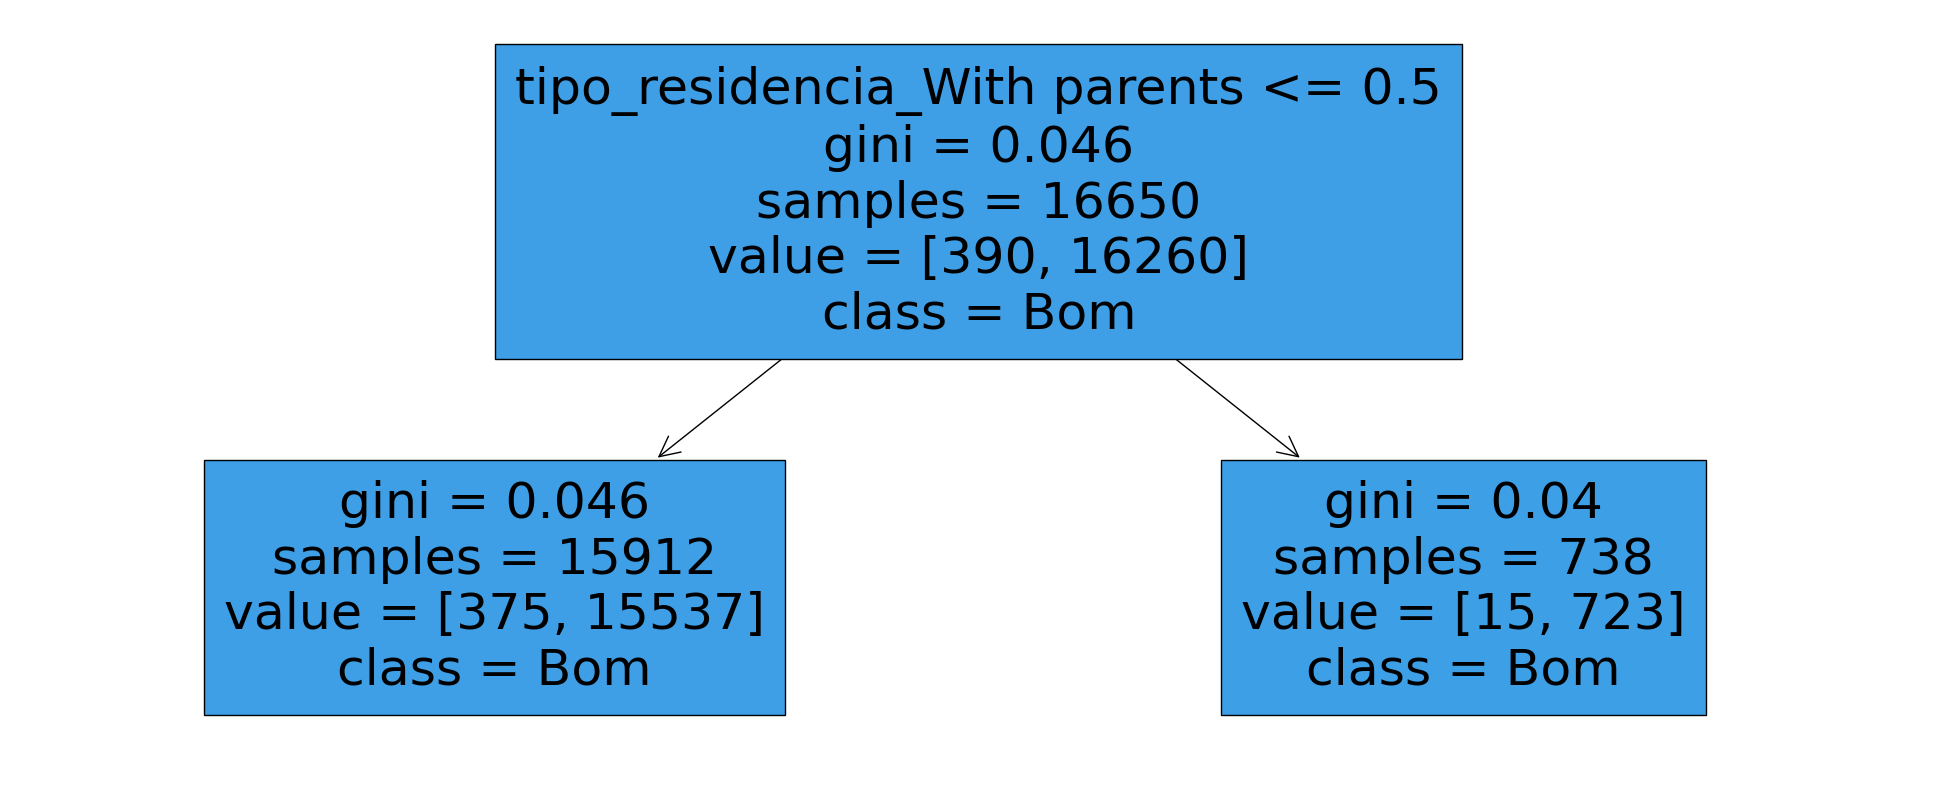

In [31]:
plt.figure(figsize=(25,10))
plot_tree(clf,
         filled=True,
         class_names=['Mau', 'Bom'],
         feature_names=['tipo_residencia_With parents']);

In [32]:
df_credit.to_csv('base_credit_1.csv', index=False)